<a href="https://colab.research.google.com/github/nlahri/Energy_Consumption_Prediction/blob/main/Energy_consumption_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Premliminary Data Analysis**


Power Consumption of Tetouan City - UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/849/power+consumption+of+tetouan+city


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.dates as mdates



In [ ]:
# reading data from the site
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


**Observation**: Clean data, no missing values, no outliers


In [ ]:
df.shape

(52416, 9)

In [ ]:
# its efficient and convinient to use datatime as index when dealing with timeseries data
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

In [ ]:
#rename columns
df = df.rename(columns={"Zone 1 Power Consumption": "Z1 Power",
                        "Zone 2  Power Consumption": "Z2 Power",
                        "Zone 3  Power Consumption": "Z3 Power",
                        })


## EDA

### Train Test Split

In [ ]:
# Test Train split

In [ ]:
# prompt: split data till 2017 dec as train

train = df[:'2017-12-01']
test = df['2017-12-01':]


In [ ]:
train.shape, test.shape

((48240, 8), (4320, 8))

### Power Consumption vs time Plots (Original Data)

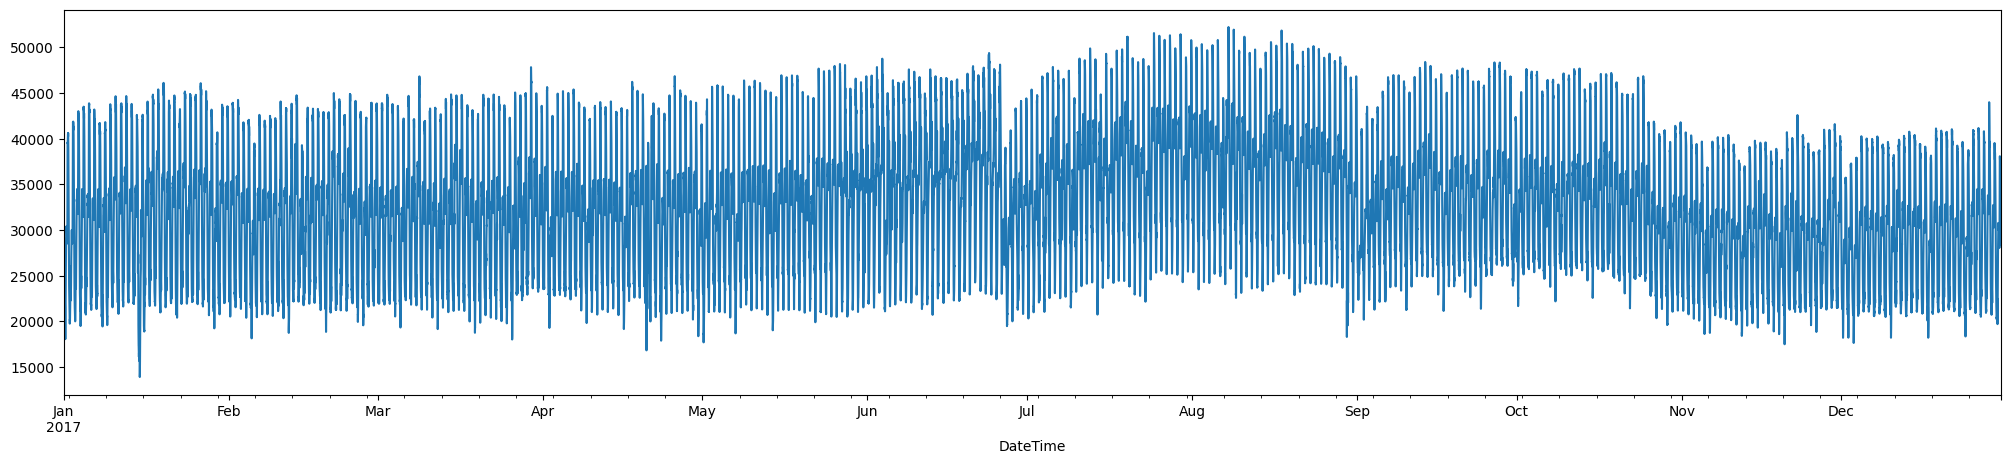

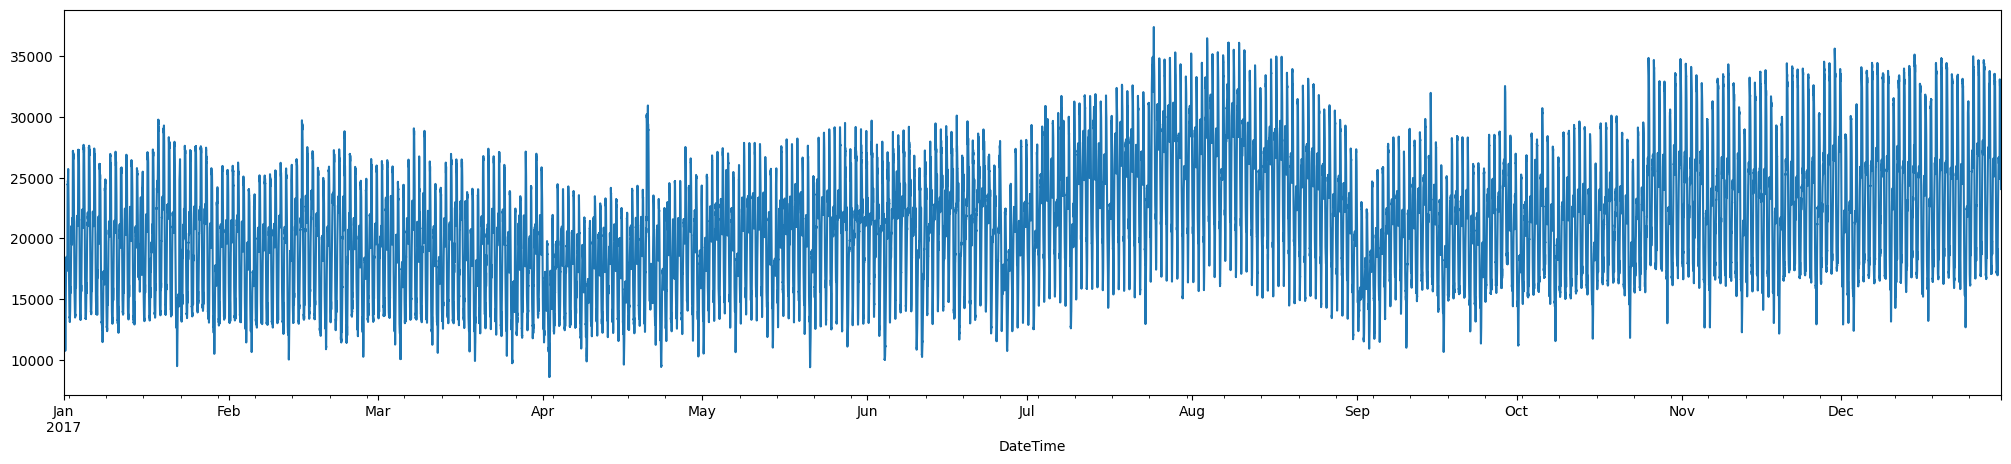

<Axes: xlabel='DateTime'>

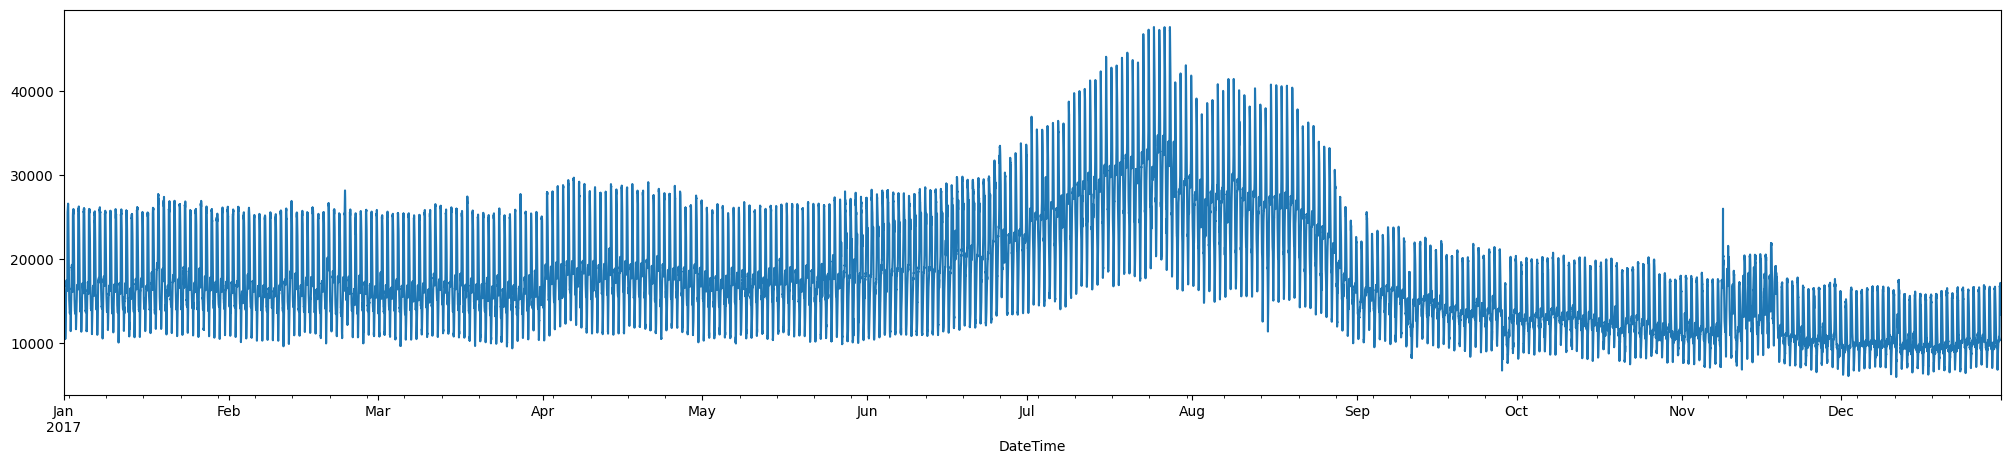

In [ ]:
df['Z1 Power'].plot(figsize=(25,5))
plt.show()
df['Z2 Power'].plot(figsize=(25,5))
plt.show()
df['Z3 Power'].plot(figsize=(25,5))


**Observation:** Z1 has the highest consumption among the 3 zones, which indicates higher coverage interms of Area

### Correlation Matrix

<Axes: >

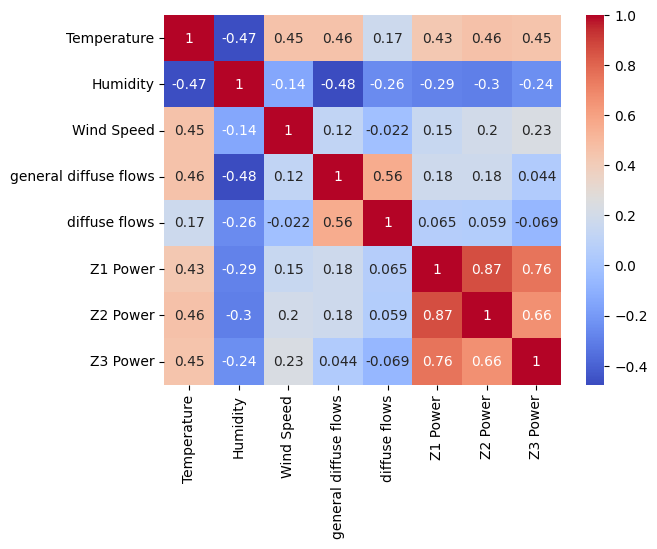

In [ ]:
corr = train.corr()
sns.heatmap(corr, annot=True,cmap="coolwarm")


**Observation:**
Temperature is positively correlated to all the power consumption zones. Higher use of air conditioning could be a possible explanation for this.

Humidity on the other hand, shows a slight negative correlation with the power consumption of all three areas

Power Z1, Power Z2, and Power Z3 show a high correlation between each other. This suggests there is a slight difference in the consumption patterns of all the areas but they all tend to increase and decrease together.




### Daily Power Consumption vs Time Plot

In [ ]:
week = 7*24*6
n =  random.randint(0,len(df)-week)
t = df.index[n:n+week]
#print(n,t)

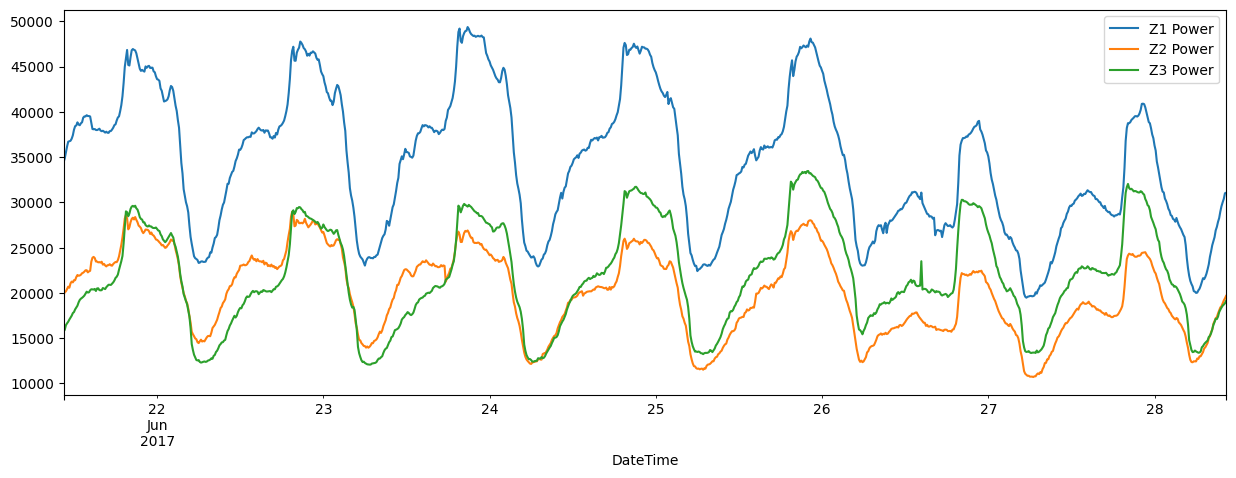

In [ ]:
df.loc[t,['Z1 Power', 'Z2 Power', 'Z3 Power']].plot(figsize=(15,5))
plt.xticks(rotation=45)
plt.show()

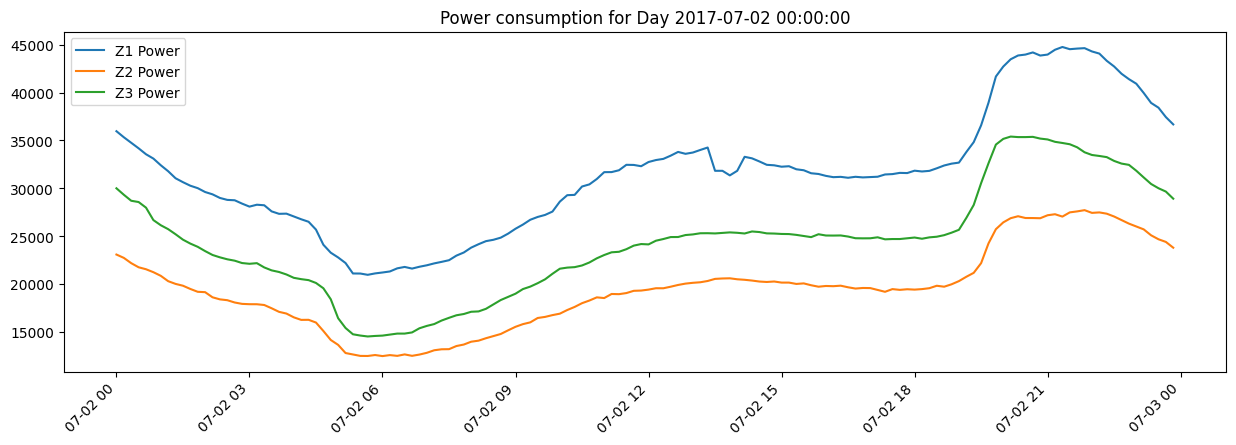

In [ ]:
# Closer look at daily consumption

day = random.randint(0,364)
date = pd.to_datetime('2017-01-01')+pd.Timedelta(days=day)
t = pd.date_range(date, periods=24*6, freq='10min')
df.loc[t,['Z1 Power', 'Z2 Power', 'Z3 Power']].plot(figsize=(15,5), x_compat=True)
plt.xticks(rotation=45)
plt.title(f'Power consumption for Day {date}')
plt.show()


**Observation:**
There is a clearn patten in the daily consumpotion of power.
Z1, Z2, Z3 all follow the same pattern and peaks.

Daily consumption has two peaks
Smaller peak around 11 am and next one around 7 pm.



In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
df = create_features(df)

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Z1 Power,Z2 Power,Z3 Power,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,2017,1,1,52


### Hourly Plots

#### Hourly Power Consumption vs Time Plot

<Axes: xlabel='hour', ylabel='value'>

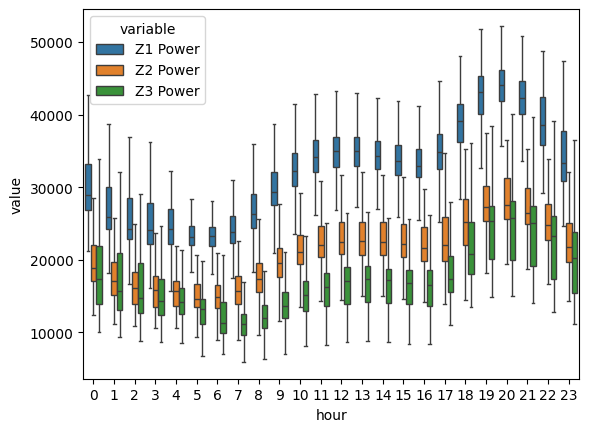

In [ ]:
sns.boxplot(x='hour', y='value', hue='variable',
            data=pd.melt(df, id_vars=['hour'], value_vars=['Z1 Power', 'Z2 Power', 'Z3 Power']), showfliers = False )


#### Hourly Temperature vs Time Box Plot

<Axes: xlabel='hour', ylabel='value'>

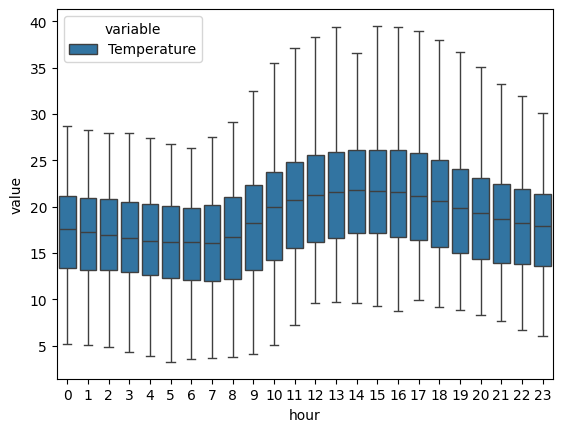

In [ ]:
sns.boxplot(x='hour', y='value', hue='variable',
            data=pd.melt(df, id_vars=['hour'], value_vars=['Temperature']), showfliers = False )


#### Hourly Humidity vs Time Box Plot

<Axes: xlabel='hour', ylabel='value'>

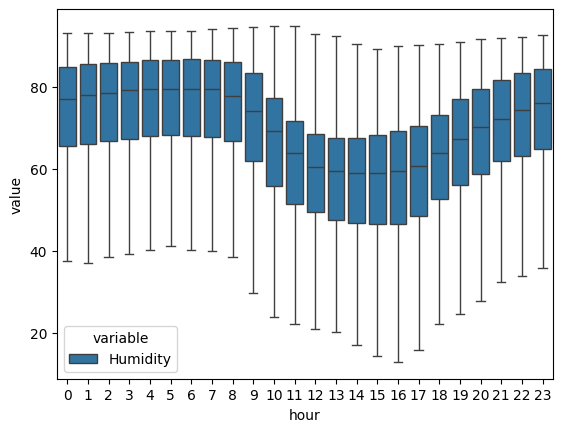

In [ ]:
sns.boxplot(x='hour', y='value', hue='variable',
            data=pd.melt(df, id_vars=['hour'], value_vars=['Humidity']), showfliers = False )


**Observation:** When examining hourly data, we observe that Zone 1 consistently exhibits higher average consumption compared to Zones 2 and 3. Additionally, all three zones experience an increase in average consumption during the evening hours.

Temperature trends, as anticipated, show an upward movement during the middle of the day, followed by a decline in the evening. Consequently, temperature and power consumption align only about half the time. As the temperature drops in the early evening hours, power consumption tends to surge rapidly.

Humidity levels, conversely, rise during the cooler hours and fall during the warmer parts of the day.

### Data Resampling Per Hour

In [ ]:
# making per hour
df_exg = df.resample('H').mean()
df_ts = df.resample('H').sum().div(1000)

df = pd.concat([df_ts[['Z1 Power', 'Z2 Power', 'Z3 Power']], df_exg[['Temperature', 'Humidity', 'Wind Speed']]], axis=1)
df = create_features(df)
df.head()

,Z1 Power,Z2 Power,Z3 Power,Temperature,Humidity,Wind Speed,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,
2017-01-01 00:00:00,175.187848,108.160486,115.512289,6.196833,75.066667,0.081833,0,6,1,1,2017,1,1,52
2017-01-01 01:00:00,147.943291,96.470517,102.257349,5.548833,77.583333,0.082000,1,6,1,1,2017,1,1,52
2017-01-01 02:00:00,132.498228,85.984195,94.056867,5.054333,78.933333,0.082333,2,6,1,1,2017,1,1,52
2017-01-01 03:00:00,124.866835,79.316717,89.303133,5.004333,77.083333,0.082833,3,6,1,1,2017,1,1,52
2017-01-01 04:00:00,122.855696,77.529483,85.902651,5.097667,74.050000,0.082333,4,6,1,1,2017,1,1,52


**Addtional notes:** The code above resamples the original dataset to an hourly frequency and processes the data for analysis. It calculates the mean of environmental variables (temperature, humidity, and wind speed) and sums the power consumption data for three zones (Z1 Power, Z2 Power, Z3 Power), converting the power values to kilowatts by dividing by 1000. Finally, it concatenates the resampled power consumption data with the environmental data into a single DataFrame, providing a comprehensive hourly view of power consumption and environmental conditions.

#### Resampled Test train split

Train dates : 2017-01-01 00:00:00 --- 2017-12-01 23:00:00  (n=8040)
Test dates  : 2017-12-01 23:00:00 --- 2017-12-30 23:00:00  (n=697)
(8040,) (696,) (8040, 5) (696, 5)


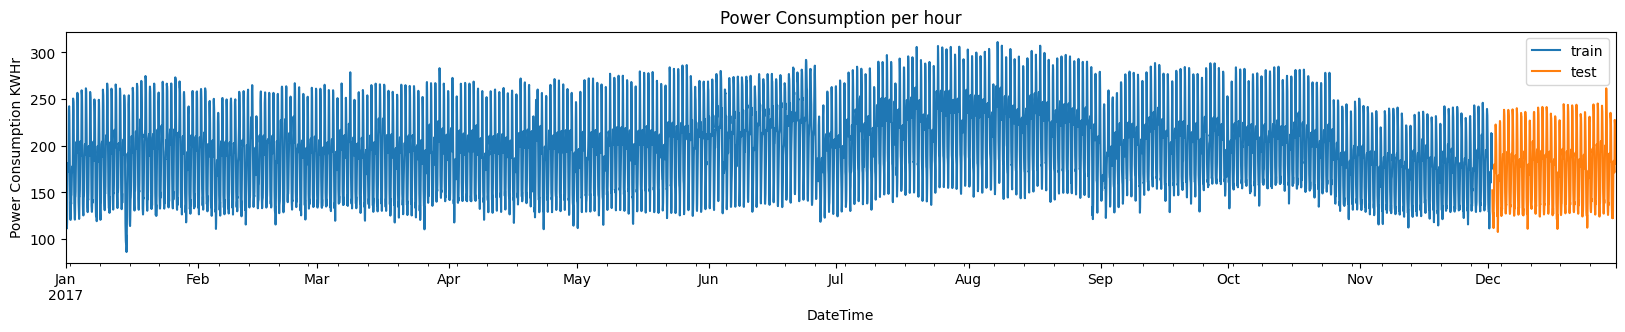

In [ ]:
end_train = '2017-12-01 23:00:00'

print(
    f"Train dates : {df.index.min()} --- {df.loc[:end_train].index.max()}  "
    f"(n={len(df.loc[:end_train])})"
)
print(
    f"Test dates  : {df.loc[end_train:].index.min()} --- {df.loc[:].index.max()}  "
    f"(n={len(df.loc[end_train:])})"
)
data_train = df.loc[:end_train]['Z1 Power']
data_test  = df.loc[end_train:]['Z1 Power']

cols = ['Temperature', 'Humidity', 'Wind Speed', 'hour','dayofweek']
data_train_exog = df.loc[:end_train][cols]
data_test_exog  = df.loc[end_train:][cols]


# removing the reated row in test and train data
data_test = data_test.iloc[1:]
data_test_exog = data_test_exog.iloc[1:]

# Plot
# ======================================================================================
fig, ax=plt.subplots(figsize=(20, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.set_title('Power Consumption per hour')
ax.set_ylabel('Power Consumption KWHr')
ax.legend();

print(data_train.shape, data_test.shape, data_train_exog.shape, data_test_exog.shape)

#### Plotting Weekly Data and Differencing for Power Consumption Analysis

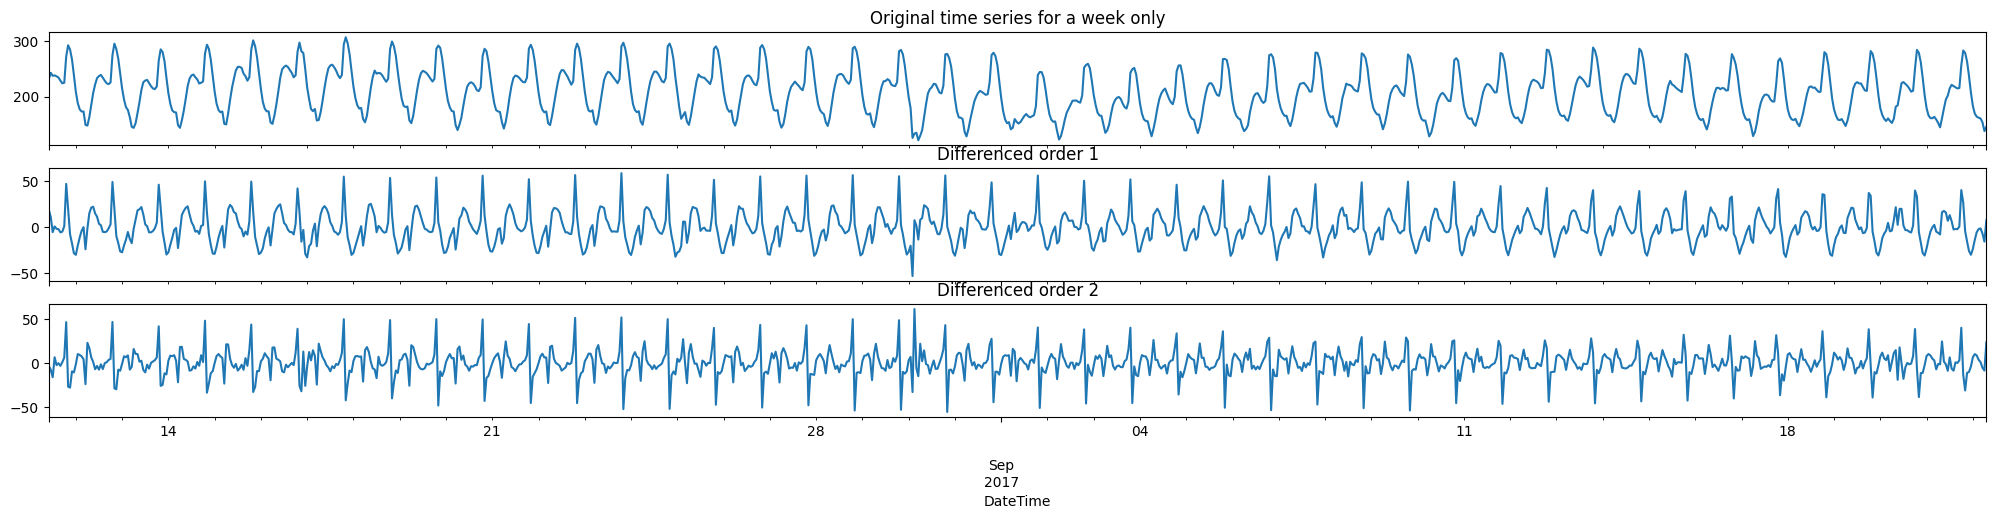

In [ ]:
# a close look only for a week of data, chosen are random
week = 7*24*6
day = 24*6
n =  random.randint(0,len(df)-week)
t = df.index[n:n+week]

data = df.loc[t,'Z1 Power']
data_diff_1 = data.diff().dropna()
data_diff_2 = data_diff_1.diff().dropna()

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(25, 5), sharex=True)
data.plot(ax=axs[0], title='Original time series for a week only')
data_diff_1.plot(ax=axs[1], title='Differenced order 1')
data_diff_2.plot(ax=axs[2], title='Differenced order 2');

#### ACF and PACF Plots

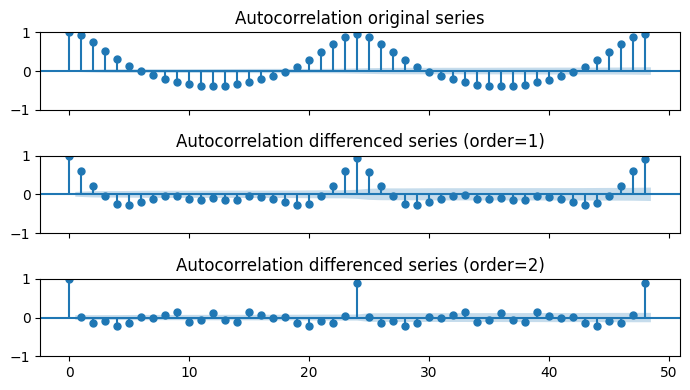

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

lag = 2*24
# add in code for ACF
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 4), sharex=True)

plot_acf(data_train, ax=axs[0], lags=lag, alpha=0.05)
axs[0].set_title('Autocorrelation original series')

plot_acf(data_diff_1, ax=axs[1], lags=lag, alpha=0.05)
axs[1].set_title('Autocorrelation differenced series (order=1)');

plot_acf(data_diff_2, ax=axs[2], lags=lag, alpha=0.05)
axs[2].set_title('Autocorrelation differenced series (order=2)' );

plt.tight_layout()

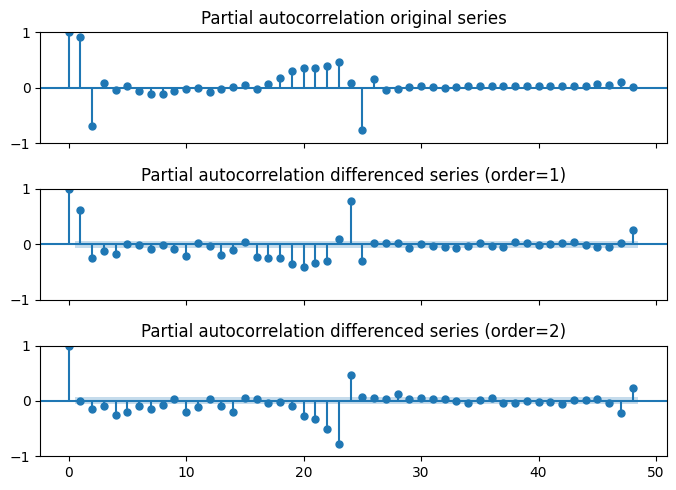

In [ ]:
# add in code for PACF
lag = 24*2

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)

plot_pacf(data_train, ax=axs[0], lags=lag, alpha=0.05)
axs[0].set_title('Partial autocorrelation original series')

plot_pacf(data_diff_1, ax=axs[1], lags=lag, alpha=0.05)
axs[1].set_title('Partial autocorrelation differenced series (order=1)');

plot_pacf(data_diff_2, ax=axs[2], lags=lag, alpha=0.05)
axs[2].set_title('Partial autocorrelation differenced series (order=2)');
plt.tight_layout();

**Observation:** clear 24 hour pattern and seasonality

#### Plotting Environmental Variables: Humidity, Temperature, and Wind Speed

<Axes: xlabel='DateTime'>

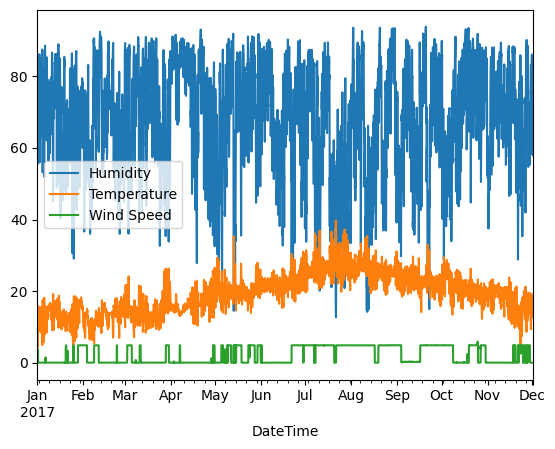

In [ ]:
# Part of EDA
data_train_exog[['Humidity', 'Temperature', 'Wind Speed']].plot()
